Consider the y = w1x + w0 linear regression problem. Assume we’ve got n train data , We are looking to minimize the following cost function:
1 nPn i=1 (y(i) −w(1)x(i) −w(0))2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import math
import itertools

In [ ]:
df = pd.read_csv("./Datasets/FirstDataset.txt", delimiter="\t", names=['x','y'])
df.head(15)

,x,y
0,-2.996219,1.424365
1,-2.987382,0.372525
2,-2.980072,-0.142835
3,-2.968503,-0.296066
4,-2.966581,-0.106994
5,-2.964482,0.466139
6,-2.964113,-0.495662
7,-2.962814,0.333751
8,-2.951097,0.154589
9,-2.932613,-0.643678


In [ ]:
X, Y = df["x"], df["y"].to_numpy().reshape((-1, 1))
X = np.column_stack([X, np.ones(len(Y))])

def gd(W, X, Y, lr=0.01, itr=5000):
    for _ in range(itr):
        W = W - (1/len(X))*lr*(X.T.dot((X.dot(W)-Y)))
    return W

def sgd(X, Y, lr=0.01, itr=5000, k=0.05):
    W = np.random.randn(2, 1)
    for i in range(itr):
        sample_num = random.sample([i for i in range(len(X))], random.randint(0, len(X)))
        sampleX, sampleY = X[sample_num,], Y[sample_num,]
        W = W - (1 / len(X)) * lr * np.dot(sampleX.T, np.dot(sampleX, W) - sampleY)
    return W

def cf(X, Y):
    return np.dot( np.linalg.inv( np.dot(X.T, X)), np.dot(X.T,Y))

we will write a python code that compute closed form solution for w0 and w1 on the ﬁrst dataset by using gradient descent and stochastic gradient descent , then compare these two together.

In [ ]:
W = np.random.randn(2, 1)
Wgd = gd(W, X, Y)
WSGD = sgd(X,Y)
WCF = cf(X, Y)
print(Wgd)
print(WSGD)

[[ 0.91488253]
 [-2.95462259]]
[[ 1.01543079]
 [-2.75747833]]


#### As we can observe the diffrence between GD and SGD is about 0.3 for each weight

In [ ]:
df2 = pd.read_csv("./Datasets/SecondDataset.txt", delimiter="\t", names=['x0','x1','x2','y'])
df2.head(15)

,x0,x1,x2,y
0,0.00632,0.538,6.575,24.0
1,0.02731,0.469,6.421,21.6
2,0.02729,0.469,7.185,34.7
3,0.03237,0.458,6.998,33.4
4,0.06905,0.458,7.147,36.2
5,0.02985,0.458,6.430,28.7
6,0.08829,0.524,6.012,22.9
7,0.14455,0.524,6.172,27.1
8,0.21124,0.524,5.631,16.5
9,0.17004,0.524,6.004,18.9


we will split second dataset into train and test data , Then Train a regression model on train data that satisfy following problems. (ﬁrst 3 columns are features and the last one is the target)

In [ ]:
X = df2[["x0", "x1", "x2"]].to_numpy()
X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
Y = df2['y'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, shuffle= False)

In [ ]:
def MSE(X,Y,W):
    return 1/len(X) * np.sum(np.square(Y-np.dot(W,X.T)))

In [ ]:
def linear_reg(X, Y, iterations = 20000, alpha = 0.0001):
    w = np.zeros(X.shape[1] )
    for i in range(iterations):
        w = w + alpha * 2/(len(X)) * np.dot(Y - np.dot(w,X.T),X)
    return w

we would like to train a 1st order regression model with SSE as cost function. Then report the w vector and error on train and test data. 

In [ ]:
w1 = linear_reg(X_train, Y_train)
print(MSE(X,Y,w1))

47.21188185154445


In [ ]:
def third_reg(X, Y):
    w = np.dot( np.dot( np.linalg.inv( np.dot( X.T, X)), X.T), Y)
    return w

here we train a 3rd order regression model with SSE as cost function. Then report the w vector and error on train and test data.

In [ ]:
w3 = third_reg(X_train, Y_train)
print(w3)
print(MSE(X_train, Y_train, w3))

[-16.0980859   -0.19345404 -13.42903707   7.47552658]
38.29850482058393


In [ ]:
def third_reg_regu(X, Y, X_test, Y_test, iterations = 20000, alpha= 4e-10):
    err_train, err_test, lambda_list = [], [], []
    listz = np.linspace(-1,20,42)
    X, X_test = itr_make(X, X_test)

    w_list = []
    for i in listz:
        w = np.zeros(X.shape[1])
        slambda = math.exp(i)
        for i in range(iterations):
            w = w + alpha * 2 / len(X) * (np.dot((Y - np.dot(w , X.T)) , X) - slambda * w)
        lambda_list.append(slambda)
        err_train.append(MSE(X,Y,w))
        err_test.append(MSE(X_test,Y_test,w))
        w_list.append(w)
    return (lambda_list, err_train, err_test, w_list)

def itr_make(X, X_test):
    a = list(itertools.combinations_with_replacement(range(X.shape[1]),3))
    X = np.array([X[:, i[0]] * X[:, i[1]] * X[:, i[2]] for i in a]).T
    X_test =  np.array([X_test[:, i[0]] * X_test[:, i[1]] * X_test[:, i[2]] for i in a]).T
    return (X, X_test)

In [ ]:
w3_reg = third_reg_regu(X_train,Y_train,X_test,Y_test)

and now we train a 3rd order regression model with SSE as cost function and||w||2 as regularization term. Then report the w vector and plot the error for train and test data based on ln(λ). 

In [ ]:
print(w3_reg[0])

[0.36787944117144233, 0.6139726608994069, 1.024690118946394, 1.7101573192660526, 2.85416830177539, 4.763466263066106, 7.949990484182254, 13.268142400552419, 22.143875909235756, 36.95703780381613, 61.679475121292526, 102.94000486276288, 171.801795983305, 286.7287323566672, 478.53612640260474, 798.6532161958444, 1332.912866025351, 2224.565897171879, 3712.6908719973353, 6196.298131035919, 10341.31627231978, 17259.147313860252, 28804.666461932855, 48073.56904108966, 80232.41801472109, 133903.95239818524, 223479.09874242608, 372975.6043810696, 622477.9061945205, 1038884.954267483, 1733847.799998998, 2893706.5468245707, 4829453.645896843, 8060120.174749803, 13451943.427721733, 22450630.767207265, 37468996.5471285, 62533909.03828814, 104366012.96995685, 174181733.2509328, 290700730.39038754, 485165195.4097903]


In [ ]:
print(w3_reg[3])

[array([ 2.03471844e-04,  1.61658434e-04,  1.05405069e-04,  1.32274357e-03,
       -1.85457680e-04,  1.00854577e-04,  9.40973544e-04,  5.67522964e-05,
        6.79343149e-04,  8.72853773e-03, -5.15115760e-06, -2.05413588e-04,
       -5.39148280e-04,  6.45452563e-05,  5.82265944e-04,  5.67853129e-03,
        3.19454870e-05,  3.62062353e-04,  4.45001909e-03,  5.84396388e-02]), array([ 2.03471843e-04,  1.61658434e-04,  1.05405068e-04,  1.32274357e-03,
       -1.85457676e-04,  1.00854577e-04,  9.40973542e-04,  5.67522962e-05,
        6.79343146e-04,  8.72853769e-03, -5.15115911e-06, -2.05413585e-04,
       -5.39148259e-04,  6.45452562e-05,  5.82265942e-04,  5.67853128e-03,
        3.19454869e-05,  3.62062351e-04,  4.45001907e-03,  5.84396386e-02]), array([ 2.03471842e-04,  1.61658433e-04,  1.05405068e-04,  1.32274356e-03,
       -1.85457670e-04,  1.00854577e-04,  9.40973539e-04,  5.67522959e-05,
        6.79343142e-04,  8.72853764e-03, -5.15116163e-06, -2.05413580e-04,
       -5.39148226e-

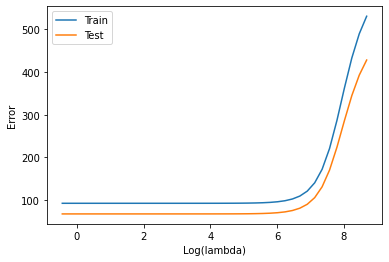

In [ ]:
from math import log10

maping = list(map(log10, w3_reg[0]))
plt.plot(maping, w3_reg[1])
plt.plot(maping, w3_reg[2])
plt.legend(["Train", "Test"])
plt.xlabel("Log(lambda)")
plt.ylabel("Error")
plt.show()

In [ ]:
def k_fold_cross(X, Y):
    Kfold= 10
    sets_length = int(len(X) / Kfold)
    
    models_tra = []
    models_tes = []
    lambdas = []
    for i in range(Kfold):
        x_train = X[np.r_[0:i * sets_length, (i + 1) * sets_length:len(X)], :]
        y_train = Y[np.r_[0:i * sets_length, (i + 1) * sets_length:len(X)]]
        x_test = X[i * sets_length : (i + 1) * sets_length, :]
        y_test = Y[i * sets_length : (i + 1) * sets_length]
        model = third_reg_regu(x_train, y_train, x_test, y_test)
        models_tra.append(model[1])
        models_tes.append(model[2])
        lambdas = model[0]
    return (lambdas, models_tra, models_tes)

In [ ]:
models = k_fold_cross(X, Y)

 For determine the best λ we implement k-fold cross validation. Then by using 10-fold cross validation will plot the error on train and test data based on different λ values and then report the best λ.

In [ ]:
argmin = min(map(min,models[2]))
for i in range(len(models[2])):
    for j in range(len(models[2][0])):
        if models[2][i][j] == argmin:
            print(w3_reg[0][j])
            break

0.36787944117144233


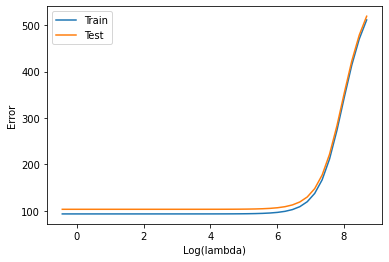

In [ ]:
maping = list(map(log10, models[0]))
plt.plot(maping, np.array(models[1]).mean(axis = 0))
plt.plot(maping, np.array(models[2]).mean(axis = 0))
plt.legend(["Train", "Test"])
plt.xlabel("Log(lambda)")
plt.ylabel("Error")
plt.show()